Classification

Ex. 1 - kNN - own implementation

In [1]:
from copy import deepcopy
import numpy as np
class kNN():
    def __init__(self,k):
        self.data = []
        self.y = []
        self.k = k
        pass

    def fit(self, data, y):
        self.data = np.array(deepcopy(data))
        self.y = np.array(deepcopy(y))

    def predict(self, x : np.ndarray):
        try:
            x = np.array(x)
            len(x[0])
            y_pred = []
            for data_x in x:
                distance = np.sqrt(np.sum((np.array(data_x)-self.data)**2,axis = 1))
                zip_object = list(zip(list(range(len(distance))),list(distance)))
                lst = sorted(zip_object,key = lambda x:x[1])
                dict_of_freq = {}
                for i in range(self.k):
                    if self.y[lst[i][0]][0] not in dict_of_freq:
                        dict_of_freq[self.y[lst[i][0]][0]] = 1
                    else:
                        dict_of_freq[self.y[lst[i][0]][0]] += 1
                maximal = max(list(dict_of_freq.values()))
                y_pred.append(list(dict_of_freq.keys())[list(dict_of_freq.values()).index(maximal)])
            return np.array(y_pred)
        except Exception as e:
            distance = np.sqrt(np.sum((np.array(x)-self.data)**2,axis = 1))
            zip_object = list(zip(list(range(len(distance))),list(distance)))
            lst = sorted(zip_object,key = lambda x:x[1])
            dict_of_freq = {}
            for i in range(self.k):
                if self.y[lst[i][0]][0] not in dict_of_freq:
                    dict_of_freq[self.y[lst[i][0]][0]] = 1
                else:
                    dict_of_freq[self.y[lst[i][0]][0]] += 1
            return list(dict_of_freq.keys())[list(dict_of_freq.values()).index(max(list(dict_of_freq.values())))]
        



1. Iris database - please divide into training and test sets

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score

In [3]:
import pandas as pd
iris = datasets.load_iris()
data_iris = pd.DataFrame(iris.data,columns = iris["feature_names"])
data_iris.head()
target_iris = pd.DataFrame(iris.target)
X_train,X_test,y_train,y_test = train_test_split(data_iris,target_iris,test_size=0.5,random_state=13134)


2. Find the best value of k for the selected test set (show on the graph change of k and the error - for both the test and training sets)

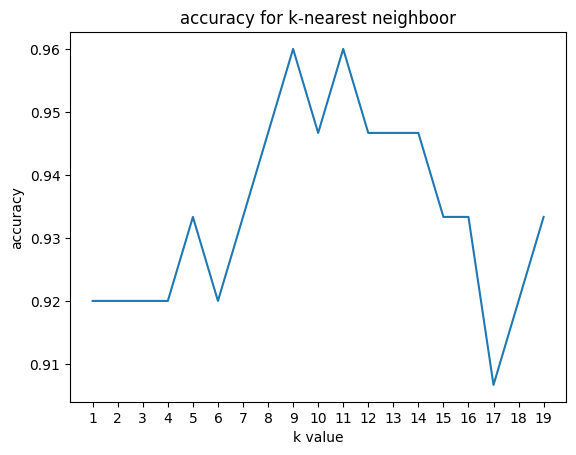

In [4]:
import matplotlib.pyplot as plt
N = 20
acc  = []
for n in range(1,N):
    knn = kNN(n)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)#.iloc[0]
    y_pred.shape = (len(y_pred), 1)
    #acc.append((np.sum(y_pred == np.array(y_test)))/len(X_test))
    acc.append(accuracy_score(y_test,y_pred))

plt.plot(list(range(1,N)),acc)
plt.xticks(list(range(1,N)))
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.title("accuracy for k-nearest neighboor")
plt.show()

best k value = 9

Ex. 2 - kNN - Python (sklearn)

In [5]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py:207: Data

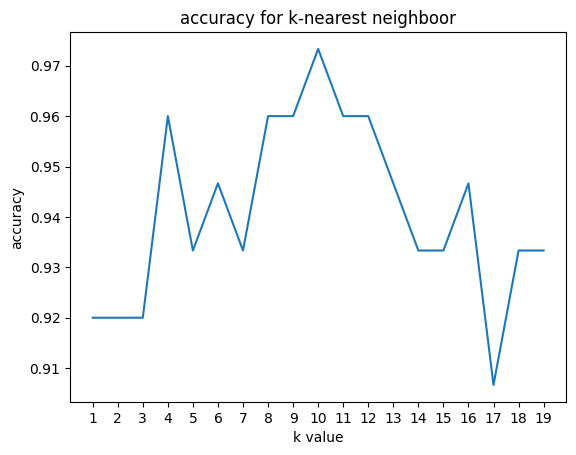

In [6]:
N = 20
acc  = []
for n in range(1,N):
    knn = KNeighborsClassifier(n)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)#.iloc[0]
    acc.append(accuracy_score(y_test,y_pred))

plt.plot(list(range(1,N)),acc)
plt.xticks(list(range(1,N)))
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.title("accuracy for k-nearest neighboor")
plt.show()

Ex.3 - Decision trees

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from tensorflow import keras

 
 
# wczytywanie danych
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Ex.1.Divide the data into parameters X and answer y:

X = np.concatenate((x_train,x_test),axis = 0)
y = np.concatenate((y_train,y_test),axis=0)
 
# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# Convert digit 10 -> 0 (error in the dataset)    
y[np.where(y==10)]=0
 
# the height and width of the picture with the number
h = 28
w = 28

# Ex 2. Please display the number of digits and the number of pixels per image
print(X.shape)


(70000, 28, 28)


Ex. 3. Please display sample digits from the dataset (functionplot_mnist).

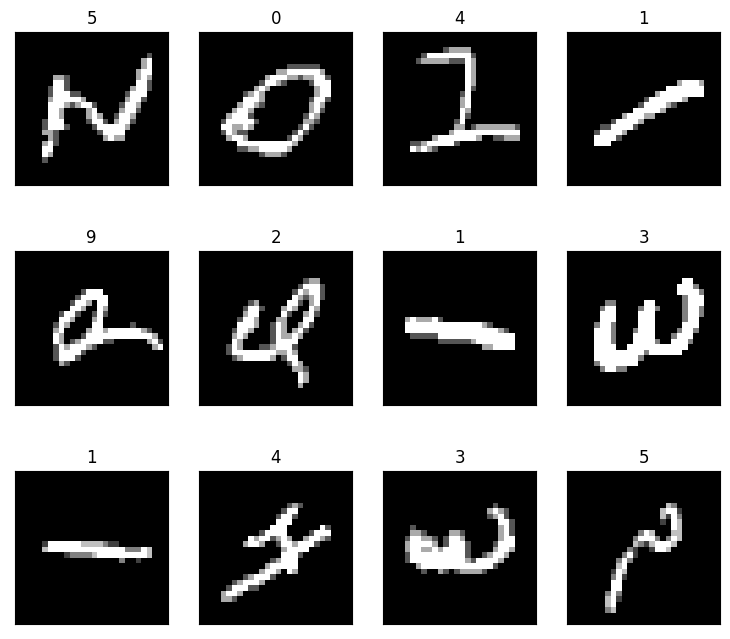

In [8]:

def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()

plot_mnist(X,y.astype(str),28,28)


Ex. 4. Please divide the dataset into learner (70%) and training.

In [9]:
X = X.reshape((len(X),784))

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,random_state=13134)

Ex. 5. Create an instance of the classifier, then train and predict for test data.
Tree parameters:

In [10]:
DEPTH = 10
clf = tree.DecisionTreeClassifier(max_depth=DEPTH)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


Zad 6. Please provide F1 result, confusion matrix and classification report.

f1 score: 0.811961695082819


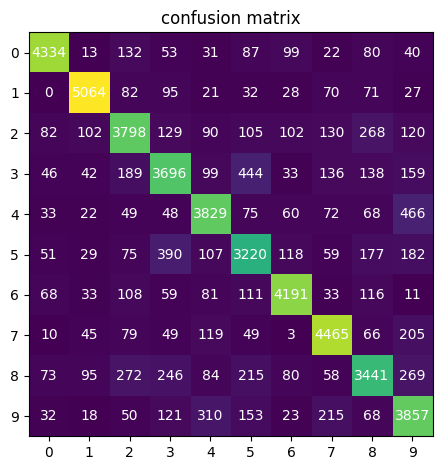

In [11]:
import sklearn.metrics

print(f"f1 score: {sklearn.metrics.f1_score(y_test,y_pred,average='macro')}")

cf_mat = sklearn.metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cf_mat)
ax.set_title("confusion matrix")
ax.set_xticks([i for i in range(10)])
ax.set_yticks([i for i in range(10)])
for i in range(len(cf_mat)):
    for j in range(len(cf_mat[0])):
        ax.text(j, i, cf_mat[i, j], ha="center", va="center", color="w")
fig.tight_layout()
plt.show()